<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Ekhterachian

**Student ID**: 400100576



# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [45]:
# import necessary libraries
import numpy as np
import pandas as pd
import sklearn.linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__ (self, lr = 1e-2, l2lambda = 0.01):
        self.w = None
        self.lr = lr
        self.l2lambda = l2lambda
    
    
    @staticmethod         
    def computeGradient(theta, X, y, regLambda):
        h = MyLogisticRegression.sigmoid(X @ theta) 
        grad = (h - y) @ X 
        grad[1:] = grad[1:] + regLambda*(theta[1:])
        return grad.T/len(y)
    
    
    @staticmethod
    def sigmoid(Z):
        return 1/(1+np.exp(-Z))
    
    @staticmethod       
    def soft_log_sigmoid_func(a):
        h = MyLogisticRegression.sigmoid(a)
        ish0 = 1 -np.heaviside(h,0)
        ish1 = np.heaviside(h-1,1)
        logh = np.log(ish0+h) + (ish0*a)
        log1_h = np.log((1-h)+ish1) - (ish1*a)
        return logh, log1_h
    
    
    def fit(self, x_tr, y_train, maxNumIters = 50000, coverge_t = 1e-4,  lr = -1, l2lambda = -1):
        if l2lambda == -1:
            l2lambda = self.l2lambda
        
        if lr == -1:
            lr = self.lr
        
        x_train = np.append(np.ones([len(y_train), 1]), x_tr, 1)    
        m, n = x_train.shape
        
        theta = np.zeros(n)
        theta_old = np.zeros(n)
        
        for _ in range(maxNumIters) :
            theta_old = theta
            theta = theta - lr * MyLogisticRegression.computeGradient(theta, x_train, y_train, l2lambda)
            if(np.linalg.norm(theta_old - theta) <coverge_t):
                break
            
        self.w = theta.copy()
        return theta.copy()
            
            
    def loss_func(self, x_train, y_train, weights = None, l2lambda = -1):
        if l2lambda == -1:
            l2lambda = self.l2lambda
        
        if weights is None:
            weights = self.w
        
        try:    
            a = x_train @ weights
        except:
            a = x_train @ weights[1:]
            a += weights[0]
        logh, log1_h = MyLogisticRegression.soft_log_sigmoid_func(a)
        loss = 0
        loss -= y_train.T @ logh 
        loss -= (1-y_train).T @ log1_h
        
        loss /= len(y_train)
        return loss + (l2lambda/2)*(np.linalg.norm(weights[1:])**2)
    
    
    def predict(self, x_test, weights = None):
        if weights is None :
            weights = self.w
            
        return np.heaviside(weights[0] + x_test @ weights[1:] ,1)
        
        

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [46]:
# Your code goes here!
df1 = pd.read_csv('Logistic_question.csv')
target_mean = df1.iloc[:,-1].mean()

traindf, testdf = train_test_split(df1, test_size=0.2)

x_train, y_train = traindf.iloc[:,:-1], traindf.iloc[:,-1]
x_test, y_test = testdf.iloc[:,:-1], testdf.iloc[:,-1]

# Making the Target Column Binary
y_train = np.heaviside(y_train.to_numpy() - target_mean, 1)
y_test = np.heaviside(y_test.to_numpy() - target_mean, 1)

# standardization...
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

# to numpy array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


blr = MyLogisticRegression()
blr.fit(x_train, y_train)
y_tr_pred = blr.predict(x_train)
y_test_pred = blr.predict(x_test)


In [47]:
# Metrics 
print('*********************************')
print('****** My Implementation ********')
print('*********************************')
print('Train Loss = ', blr.loss_func(x_train, y_train))
print('Test Loss = ', blr.loss_func(x_test, y_test))
print()
print('Train Accuracy Score = ', accuracy_score(y_train, y_tr_pred))
print('Test Accuracy Score = ', accuracy_score(y_test, y_test_pred))
print()
print('Train Precision Score = ', precision_score(y_train, y_tr_pred))
print('Test Precision Score = ', precision_score(y_test, y_test_pred))
print()
print('Train Recall Score = ', recall_score(y_train, y_tr_pred))
print('Test Recall Score = ', recall_score(y_test, y_test_pred))


*********************************
****** My Implementation ********
*********************************
Train Loss =  0.2843214763187266
Test Loss =  0.3791300310852349

Train Accuracy Score =  0.884375
Test Accuracy Score =  0.8625

Train Precision Score =  0.9024390243902439
Test Precision Score =  0.8

Train Recall Score =  0.8757396449704142
Test Recall Score =  0.9142857142857143


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

Accuracy = $\frac{T}{T+F}$

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP+FN}$


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    .container {
      display: flex;
      flex-direction: row-reverse;
    }
    .text {
      flex: 1;
      text-align: justify;
    }
    .title {
      flex: 0;
      text-align: right;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <div class="text">
      <p dir="rtl">
به کمک  این موارد می توان فهمید درصد صحت چگونه است و خطا بیشتر در چه حالتی رخ می‌دهد و به خصوص اگر خطا های مختلف برایمان هزینه های مختلف داشته باشد می‌توان از تفاوت این متریک  ها استفاده کرد.
<br>
</br>
</p>
    </div>
  </div>
</body>
</html>


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [48]:
# Your code goes here!
sk_blr = sklearn.linear_model.LogisticRegression()
sk_blr.fit(x_train, y_train)

sk_blr_test_pre = sk_blr.predict(x_test)
sk_blr_tr_pre = sk_blr.predict(x_train)

print('*********************************')
print('*********** sklearn******* *******')
print('*********************************')

print('Train Loss = ', blr.loss_func(x_train, y_train, weights=sk_blr.coef_.T)[0])
print('Test Loss = ', blr.loss_func(x_test, y_test, weights=sk_blr.coef_.T)[0])
print()
print('Train Accuracy Score = ', accuracy_score(y_train, sk_blr_tr_pre))
print('Test Accuracy Score = ', accuracy_score(y_test, sk_blr_test_pre))
print()
print('Train Precision Score = ', precision_score(y_train, sk_blr_tr_pre))
print('Test Precision Score = ', precision_score(y_test, sk_blr_test_pre))
print()
print('Train Recall Score = ', recall_score(y_train, sk_blr_tr_pre))
print('Test Recall Score = ', recall_score(y_test, sk_blr_test_pre))

*********************************
*********** sklearn******* *******
*********************************
Train Loss =  0.2922058568648273
Test Loss =  0.35042003973710995

Train Accuracy Score =  0.896875
Test Accuracy Score =  0.85

Train Precision Score =  0.9047619047619048
Test Precision Score =  0.7804878048780488

Train Recall Score =  0.8994082840236687
Test Recall Score =  0.9142857142857143


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**
پیاده سازی ما یک درصد صحت بهتری دارد که البته می‌تواند با ران های مختلف و در نتیجه تغییر دسته ترین و تست یا تغییر پارامتر ها کم و بیشتر شود.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [49]:
# import necessary libraries
from tqdm import tqdm

class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    
    def __init__ (self, class_num, lr = 1e-3, l2lambda = 0.01):
        self.w = None
        self.lr = lr
        self.l2lambda = l2lambda
        self.class_num = class_num
    
    @staticmethod
    def soft_max(z, dim = 1):
        ex = np.exp(z)
        d = np.diag(1/np.sum(ex,dim))
        if dim == 1:
            result = d @ ex 
        else:
            result = ex @ d
        return result
    
    @staticmethod
    def one_hot(y_arr, class_num):
        result = np.zeros([len(y_arr),class_num])
        for i, y in enumerate(y_arr):
            result[i, int(y)] = 1
        return result
        
    
    @staticmethod         
    def computeGradient(theta, X, y, regLambda, class_num):
        h = MyMultinomialLogisticRegression.soft_max(X @ theta, 1) 
        one_hot_y = MyMultinomialLogisticRegression.one_hot(y, class_num)
        grad = X.T @ (h - one_hot_y)
        grad = grad + regLambda*(theta)
        return grad/len(y)


    def fit(self, x_tr, y_train, maxNumIters = 10000, coverge_t = 1e-4,  lr = -1, l2lambda = -1):
        if l2lambda == -1:
            l2lambda = self.l2lambda
        
        if lr == -1:
            lr = self.lr
        
        x_train = np.append(np.ones([len(y_train), 1]), x_tr, 1)
        m, n = x_train.shape
        
        theta = np.zeros([n,self.class_num])
        theta_old = np.zeros([n,self.class_num])
        
        for _ in range(maxNumIters) :
            theta_old = theta
            theta = theta - lr * MyMultinomialLogisticRegression.computeGradient(theta, x_train, y_train, l2lambda,self.class_num)
            if(np.linalg.norm(theta_old - theta) < coverge_t):
                break
            
        self.w = theta.copy()
        return theta.copy()
    
    def predict(self, x_test, weights = None):
        if weights is None :
            weights = self.w
        
        a = weights[0,:] + x_test @ weights[1:,:]
        
        return np.argmax(a,1)
    
    def loss_func(self, x_train, y_train, weights = None, l2lambda = -1):
        if l2lambda == -1:
            l2lambda = self.l2lambda
        
        if weights is None:
            weights = self.w
        
        try:    
            a = x_train @ weights
        except:
            a = x_train @ weights[1:]
            a += weights[0]
        
                
        h = MyMultinomialLogisticRegression.soft_max(a)
        loss = 0
        for i in range(len(y_train)):
            loss -= np.log(h[i,int(y_train[i])])
            
        loss /= len(y_train)
        
        return loss + (l2lambda/2)*(np.linalg.norm(weights)**2)



**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [50]:
# Your code goes here!
def get_data_set(df, qlevel):
    df = df.copy()
    mi = df.iloc[:,-1].min()
    ma = df.iloc[:,-1].max()
    df.iloc[:,-1] = (qlevel*0.99*((df.iloc[:,-1] - mi)/(ma - mi))) //1
    traindf, testdf = train_test_split(df, test_size=0.2)

    x_train, y_train = traindf.iloc[:,:-1], traindf.iloc[:,-1]
    x_test, y_test = testdf.iloc[:,:-1], testdf.iloc[:,-1]

    # standardization...
    x_train = (x_train - x_train.mean())/x_train.std()
    x_test = (x_test - x_test.mean())/x_test.std()

    # to numpy array
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    return x_train, y_train.to_numpy(), x_test, y_test.to_numpy()


mymlr_result = []
sklmlr_result = []
qvals = [2,3,4,5,6,7,8,9,10]
for q in tqdm(qvals):
    x_train, y_train, x_test, y_test = get_data_set(df1 ,q)
    skmlr = sklearn.linear_model.LogisticRegression(multi_class='multinomial')
    skmlr.fit(x_train, y_train)
    skp_tr = skmlr.predict(x_train)
    skp_test = skmlr.predict(x_test)
    mlr = MyMultinomialLogisticRegression(class_num=q)
    coef = np.array(skmlr.coef_.tolist() + [np.zeros(skmlr.coef_.shape[1]).tolist()])
    
    sklmlr_result.append([mlr.loss_func(x_train,y_train, coef.T), mlr.loss_func(x_test,y_test, coef.T),
                         accuracy_score(y_train, skp_tr), accuracy_score(y_test, skp_test),
                         precision_score(y_train, skp_tr, average='micro'), precision_score(y_test, skp_test, average='micro'),
                         recall_score(y_train, skp_tr, average='micro'), recall_score(y_test, skp_test, average='micro')])
    
    mlr.fit(x_train, y_train)
    yptr = mlr.predict(x_train)
    ypte = mlr.predict(x_test)
    
    mymlr_result.append([mlr.loss_func(x_train,y_train), mlr.loss_func(x_test,y_test),
                         accuracy_score(y_train, yptr), accuracy_score(y_test, ypte),
                         precision_score(y_train, yptr, average='micro'), precision_score(y_test, ypte, average='micro'),
                         recall_score(y_train, yptr, average='micro'), recall_score(y_test, ypte, average='micro')])


100%|██████████| 9/9 [00:29<00:00,  3.23s/it]


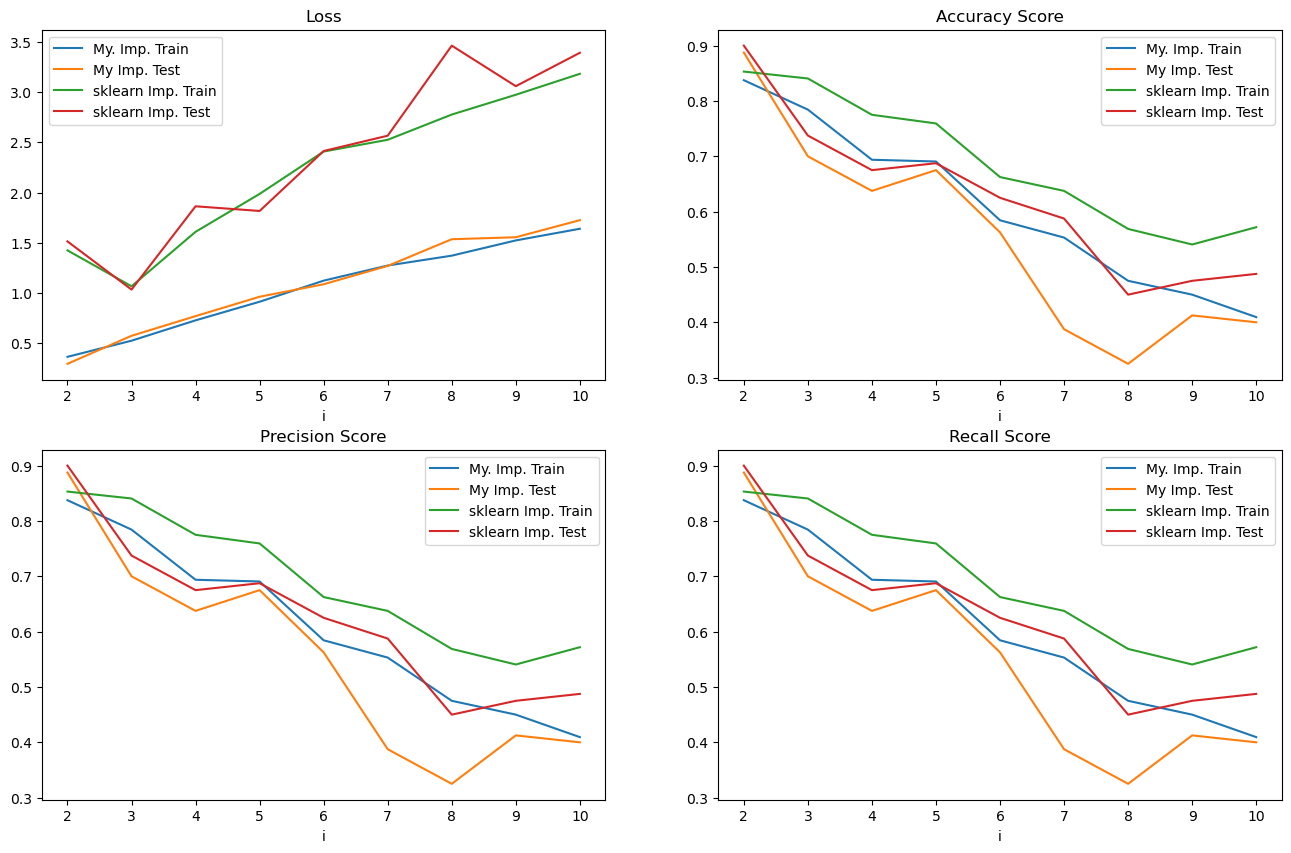

In [51]:
import matplotlib.pyplot as plt
mymlr_result = np.array(mymlr_result)
sklmlr_result = np.array(sklmlr_result) 
plt.figure(figsize=(16,10))

tit = ['Loss', 'Accuracy Score', 'Precision Score', 'Recall Score']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(qvals, mymlr_result[:,2*i], label = 'My. Imp. Train')
    plt.plot(qvals, mymlr_result[:,2*i+1], label = 'My Imp. Test')
    plt.plot(qvals, sklmlr_result[:,2*i], label = 'sklearn Imp. Train')
    plt.plot(qvals, sklmlr_result[:,2*i+1], label = 'sklearn Imp. Test')
    plt.legend()
    plt.xlabel('i')
    plt.title(tit[i])



**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    .container {
      display: flex;
      flex-direction: row-reverse;
    }
    .text {
      flex: 1;
      text-align: justify;
    }
    .title {
      flex: 0;
      text-align: right;
      margin-left: 20px;
    }
  </style>
</head>
<body>
  <div class="container">
    <div class="text">
      <p dir="rtl">
به طور کلی با افزایش دسته ها دقت پایین تر آمد اما باید به این نکته نیز توجه داشت که هرچه دسته ها بیشتر شوند احتمال حدس رندوم درست هم کمتر می‌شود
پس لزوما بدتر شدن صحت را نمیتوان به معنی عملکرد بدتر دانست.
<br>
اما به هرحال هرچه دسته ها بیشتر باشند هم برای هر دسته داده های بیشتری موجود است و هم پارامتر های کمتری برای یادگیری لازم است و یادگیری راحت تر خواهد بود.

</br>
</p>
    </div>
  </div>
</body>
</html>


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [52]:
'''
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
''';

Then use this code to automatically download the dataset into Colab.

In [53]:
'''
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip
'''
df2 = pd.read_csv('adult.csv')
df2


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Task:** Determine the number of null entries!

In [54]:
# Your code goes here!
tot = 0
for c in df2.columns:
    t = df2[c].value_counts()
    try:
        r = t['?']
    except:
        r = 0
    print(c, r)
    tot += r
print('*************')
print('Total = ',tot )
print('*************')


age 0
workclass 2799
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 2809
relationship 0
race 0
gender 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 857
income 0
*************
Total =  6465
*************


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
Null Values:
Null values, also known as missing values, are common in real-world datasets. They can occur due to a variety of reasons, such as data entry errors or incomplete data.

If a column has more than 50% null values, it may be best to drop that column as it won’t provide enough information for the model. However, if the number of null values is less than 50%, we can use a simple imputer to fill in the missing values with the mean, median, or most frequent value.

In this question I use the last method and replace '?' with the most frequent occurrence. Because the number of '?'s in columns containing '?' is at most 6 percent.

**Task:** Handle null entries using your best method.

In [55]:
# Your code goes here!

mod = df2.mode()
clean_df2 = df2.copy()
for c in df2.columns:
    clean_df2[c] = df2[c].replace('?', mod[c].array[0])
    
tot = 0
for c in clean_df2.columns:
    t = clean_df2[c].value_counts()
    try:
        r = t['?']
    except:
        r = 0
    tot += r
print('******************')
print('Total #\'?\' = ',tot )
print('******************')

******************
Total #'?' =  0
******************


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [56]:
# Your code goes here!
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
cat_col_val = {}
clean_df2.iloc[:,1].value_counts().to_dict().keys()
for c in cat_cols:
    t = clean_df2[c].value_counts()   
    for i, v in enumerate(t.keys()):
        t[v] = i
    cat_col_val[c] = t

for c in cat_cols:
    clean_df2[c] = clean_df2[c].apply(lambda x: cat_col_val[c][x])
    
clean_df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,5,7,1,6,2,1,0,0,0,40,0,0
1,38,0,89814,0,9,0,9,0,0,0,0,0,50,0,0
2,28,2,336951,6,12,0,11,0,0,0,0,0,40,0,1
3,44,0,160323,1,10,0,6,0,1,0,7688,0,40,0,1
4,18,0,103497,1,10,1,0,2,0,1,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,6,12,0,10,4,0,1,0,0,38,0,0
48838,40,0,154374,0,9,0,6,0,0,0,0,0,40,0,1
48839,58,0,151910,0,9,4,3,3,0,1,0,0,40,0,0
48840,22,0,201490,0,9,1,3,2,0,0,0,0,20,0,0


In [68]:
traindf, testdf = train_test_split(clean_df2, test_size=0.2, shuffle=True)
X_train , Y_train = traindf.iloc[:, :-1], traindf.iloc[:,-1]
X_test, Y_test = testdf.iloc[:, :-1], testdf.iloc[:,-1]

m = X_train.mean()
s = X_train.std()

X_train = (X_train - m)/s
X_test = (X_test - m)/s

X_train , Y_train = X_train.to_numpy(), Y_train.to_numpy()
X_test, Y_test = X_test.to_numpy(), Y_test.to_numpy()

grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000]}

sk_model_lr = sklearn.linear_model.LogisticRegression(penalty='l2')
skgr_lr = sklearn.model_selection.GridSearchCV(sk_model_lr,  param_grid=grid_values)
skgr_lr.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",skgr_lr.best_params_)
print("accuracy :",skgr_lr.best_score_)
ypred = skgr_lr.predict(X_test)
print('test accuracy', accuracy_score(Y_test, ypred))



tuned hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.8389168022158172
test accuracy 0.8336574879721568


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [77]:
# Your code goes here!
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


def i_train_num_test_split(x_train, y_train, trn):
    tr_result = []
    ind = np.arange(len(y_train))
    np.random.shuffle(ind)
    r = len(ind) % trn
    splt = np.split(ind[:-r],trn)
    for s in splt:
        x_tr, y_tr = x_train[s, :], y_train[s]
        tr_result.append((x_tr, y_tr))
    
    return tr_result 
        

train_set =  i_train_num_test_split(X_train, Y_train, 10)


my_ensemble = np.zeros(X_train.shape[1]+1)
for i, tr in tqdm(enumerate(train_set)):
    mylr = MyLogisticRegression()
    mylr.fit(tr[0], tr[1])
    my_ensemble += mylr.w

my_ensemble = my_ensemble / 10

y_my_ens = MyLogisticRegression().predict(X_test, my_ensemble)

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
y_rf_pred = rf.predict(X_test)


adab = AdaBoostClassifier(n_estimators=10)
adab.fit(X_train, Y_train)
y_adab_pred = adab.predict(X_test)

print('My Log. Reg. Mean Ensemble Accuracy (i = 10): ', accuracy_score(Y_test, y_my_ens))
print('Random Forest Ensemble Accuracy (i = 10): ', accuracy_score(Y_test, y_rf_pred))
print('AdaBoost Ensemble Accuracy (i = 10):', accuracy_score(Y_test, y_adab_pred))



10it [00:10,  1.02s/it]


My Log. Reg. Mean Ensemble Accuracy (i = 10):  0.8309960077797113
Random Forest Ensemble Accuracy (i = 10):  0.8532091309243526
AdaBoost Ensemble Accuracy (i = 10): 0.8467601596888116


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
Random Forest has the best accuracy.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [79]:
# Your code goes here!
results = {}
for i in tqdm(range(2,101)):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, Y_train)
    y_rf_pred = rf.predict(X_test)
    results [i] = accuracy_score(Y_test, y_rf_pred)
    


100%|██████████| 99/99 [07:44<00:00,  4.69s/it]


Text(0, 0.5, 'Accuracy')

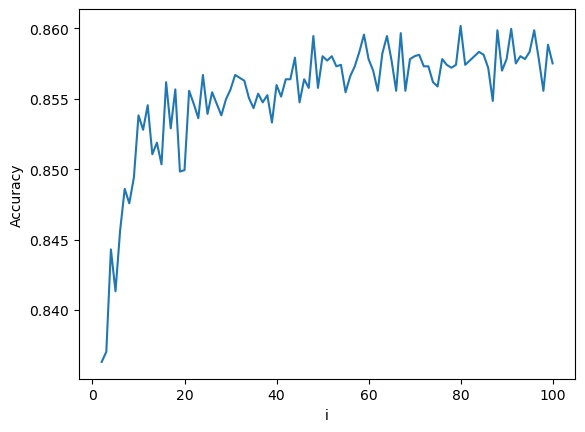

In [81]:
plt.plot(results.keys(), results.values())
plt.xlabel('i')
plt.ylabel('Accuracy')

**Question:** Analyze the results.

**Your Answer:**

با بیشتر شدن دسته ها صحت روند کلی صعودی دارد.
